<a href="https://colab.research.google.com/github/aka-hombre/MAT421/blob/main/HWHi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW Module G: Section 22.1, 22.2, 22.3**#

---




##22.1 - ODE Initial Value Problem Statement##

An Ordinary Differential Equation (ODE) is a differential equation in one dimension. Its general for is:

\begin{equation}
F(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \dots, \frac{d^{n-1}f(x)}{dx^{n-1}}) = \frac{d^nf(x)}{dx^n}
\end{equation}

Where F is some function incorperating all the input argiments. Such function is an ***nth ordered ODE***.

A solution to an ODE, $p(x)$ for example, is a function that satisfies the differential equaiton and the known values of the derrivatives at certain points. In other words, $p(x)$ must satisfy the DE and $𝑝^{(𝑗)}(𝑥_𝑖)=𝑝_𝑖$, where $𝑝(𝑗)$ is the $j^{th}$ derivative of $p$, for $n$ triplets, $(𝑗,𝑥_𝑖,𝑝_𝑖)$.


Most commonly, the known values of an ODE will be its initial conditions or initial value. Finding a solution to an ODE given inital values is called an **initial value problem**.

##22.2 - Reduction of Order##

A useful method of solving ODEs, is rudicing the ODE into a system of first ordered differential equations. To do this, we can use a vector $S(t)$. $S(t)$ is a vector describing the state of the system as a function of time.

From earlier, we know ODEs are expressed as such:
\begin{equation}
f^{(n)}(x) = F(x, f(x), f^{(1)}(t), f^{(2)}(t), \dots, f^{(n-1)}(t))
\end{equation}


The vector S(t) looks like this:
\begin{align}
S(t) = \begin{bmatrix}f(t) \\ f^{(1)}(t)\\ f^{(2)}(t) \\ \dots \\ f^{(n-1)}(t)\end{bmatrix}
\end{align}

Now notice:

\begin{align}
\frac{dS(t)}{dt} =\begin{bmatrix} f^{(1)}(t)\\ f^{(2)}(t) \\ f^{(3)}(t)\\ \dots \\ f^{(n)}(t)\end{bmatrix} =\begin{bmatrix} f^{(1)}(t)\\ f^{(2)}(t) \\ f^{(3)}(t)\\ \dots \\ F(x, f(x), f^{(1)}(t), f^{(2)}(t), \dots, f^{(n-1)}(t))\end{bmatrix} =
\begin{bmatrix} S_2(t)\\ S_3(t) \\ S_4(t)\\ \dots \\ F(x, S_1(x), S_2(t), \dots, S_{n-1}(t))\end{bmatrix}
\end{align}

##21.3 - Euler's Method##

When working with First order ODE, on an interval of space h, $[t_0, t_f]$, where $t_0 = Nh, \ N \in\mathbf{Z^+}$ The linear approximation of a first ordered ODE $\frac{dS(t)}{dt} = F(t, S(t))$ around $t_j$ and $t_{j+1}$ is:

\begin{align}
S(t_{j+1}) = S(t_j) + (t_{j+1})\frac{dS(t)}{dt}
\end{align}

This is the Explicit Euler's Formula. This allows us to compute an approximation for the state at $𝑆(𝑡_{𝑗+1})$ given the state at $𝑆(𝑡_𝑗)$. Starting from an initial value of $𝑆_0=𝑆(𝑡_0)$, we can use this formula to integrate the states up to $𝑆(𝑡_𝑓)$; these $𝑆(𝑡)$ values are then an approximation for the solution of the differential equation.

We can use python to find the approximate solution to an ODE using this method!

Let's try: $\frac{dy}{dt} = y$, with $y_0 = 1$, the analytical solution is $y = e^t$

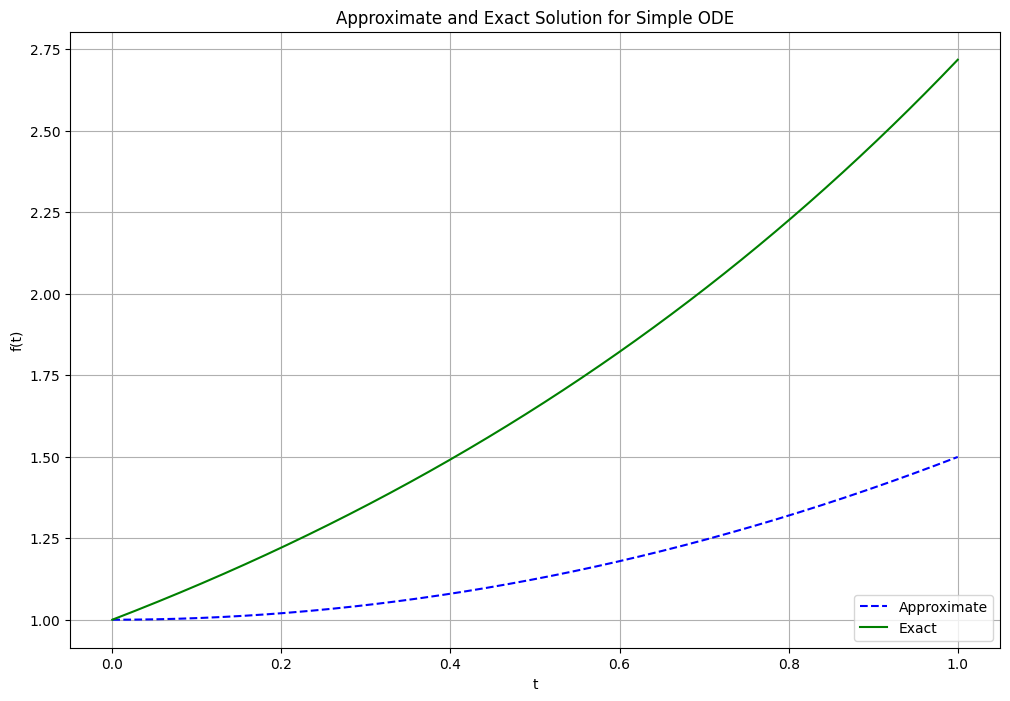

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Define parameters
f = lambda t, s: t # ODE
h = 0.001 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = 1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, np.exp(t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()